/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

Object selection: knn

Dfmf

Parameters

12 10 8 8


rmse: 0.44953348736418236

auc: 0.9586013508410742

rmse: 0.44953348736418236


-----



rmse: 0.44953348736418236

auc: 0.9586013508410742

Preselection

Object selection: knn

Dfmf

Parameters

12 10 8 8


rmse: 0.46119231571236785

auc: 0.9490420988407564

rmse: 0.46119231571236785


-----



rmse: 0.46119231571236785

auc: 0.9490420988407564

Preselection

Object selection: knn

Dfmf

Parameters

12 10 8 8


rmse: 0.46079209100895396

auc: 0.9548697221459878

rmse: 0.46079209100895396


-----



rmse: 0.46079209100895396

auc: 0.9548697221459878

Preselection

Object selection: knn

Dfmf

Parameters

12 10 8 8


rmse: 0.4455245074022982

auc: 0.946074051689025

rmse: 0.4455245074022982


-----



rmse: 0.4455245074022982

auc: 0.946074051689025

Preselection

Object selection: knn

Dfmf

Parameters

12 10 8 8


rmse: 0.44537033729521286

auc: 0.9516185623126816

rmse: 0.44537033729521286


-----



rmse: 0.44537033

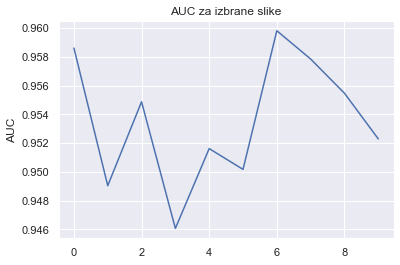

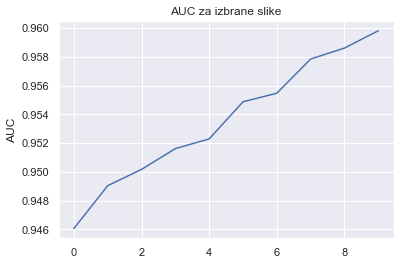

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt

# Parameters
data_directory = '../../data/generated-data-nr-2-n-8-2/'
features_path = '../../data/features-generated-data-nr-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features = get_features(features_path, name_vector)

# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-knn.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 0.4812376398074737


-----



rmse: 0.4812376398074737

auc: 0.9523166272462823
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 0.47784856405822274


-----



rmse: 0.47784856405822274

auc: 0.9528890822212114
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 0.47913078279348165


-----



rmse: 0.47913078279348165

auc: 0.9436962694218787
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 0.4790586017923175


-----



rmse: 0.4790586017923175

auc: 0.9406055037472042
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 0.4694232009763506


-----



rmse: 0.4694232009763506

auc: 0.9464373464373464
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 0.47345228795081407


-----



rmse: 0.47345228795081407

auc: 0.9387157484558305
Object selection: random

Dfmf

Parameters

14 10 8 8


rmse: 0.4786697840229238


-----



rmse: 0.4786697840229238

auc: 0.9369822002875224


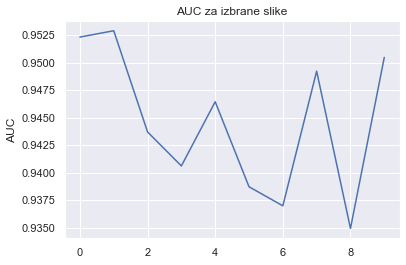

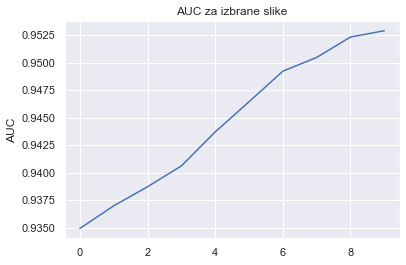

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-random.csv'
save_scores(scores, results_file)


Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.47452965975627925


-----



rmse: 0.47452965975627925

auc: 0.9563886049072036

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.46568879708970395


-----



rmse: 0.46568879708970395

auc: 0.9657142761474894

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.47283774215114893


-----



rmse: 0.47283774215114893

auc: 0.9518558881979613

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.4843310460464794


-----



rmse: 0.4843310460464794

auc: 0.9387837805240856

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.47917269470907936


-----



rmse: 0.47917269470907936

auc: 0.947419521374923

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.48519404069230554


-----



rmse: 0.48519404069230554

auc: 0.9583161649197804

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 

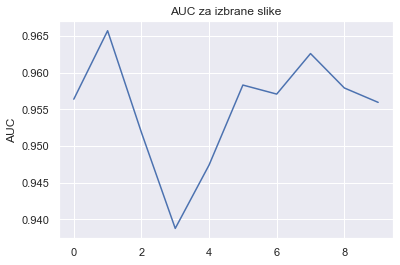

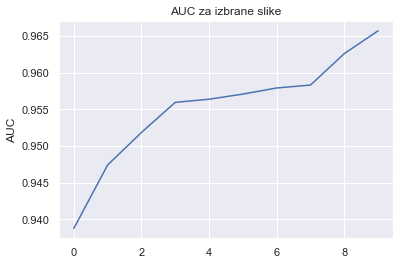

In [4]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt

# Parameters
data_directory = '../../data/generated-data-nr-2-n-8-2/'
features_path = '../../data/features-generated-data-nr-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features = get_features(features_path, name_vector)



# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-rf.csv'
save_scores(scores, results_file)

In [3]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt
from basic_factorization import BasicFactorization

# Parameters
data_directory = '../../data/generated-data-nr-2-n-8-2/'
features_path = '../../data/features-generated-data-nr-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features = get_features(features_path, name_vector)


cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-nr-2-n-8-2-b.csv'
save_scores(scores, results_file)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Object selection: random

Dfmf

auc: 0.9548738211013619
Object selection: random

Dfmf

auc: 0.9545380922454956
Object selection: random

Dfmf

auc: 0.9578168604836805
Object selection: random

Dfmf

auc: 0.9517276668829681
Object selection: random

Dfmf

auc: 0.9605843191563913
Object selection: random

Dfmf

auc: 0.9530855926860025
Object selection: random

Dfmf

auc: 0.9606751972979118
Object selection: random

Dfmf

auc: 0.9572870984851425
Object selection: random

Dfmf

auc: 0.954150804401809
Object selection: random

Dfmf

auc: 0.9619908707865168
